In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem description
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for `h1n1_vaccine` and one for `seasonal_vaccine`.

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.

For this competition, there are two target variables:

- `h1n1_vaccine` - Whether respondent received H1N1 flu vaccine.
- `seasonal_vaccine` - Whether respondent received seasonal flu vaccine.
Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

The features in this dataset
You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

- `h1n1_concern` - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned. -> (__categorical__ __Ordinal__)
- `h1n1_knowledge` - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- `behavioral_antiviral_meds` - Has taken antiviral medications. (binary) -> (__categorical__ __Nominal__)
-`behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary) -> (__categorical__ __Nominal__)
-`behavioral_face_mask` - Has bought a face mask. (binary) -> (__categorical__ __Nominal__)
behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary) -> (__categorical__ __Nominal__)
-`behavioral_large_gatherings` - Has reduced time at large gatherings. -> (__categorical__ __Nominal__)
-`behavioral_outside_home` - Has reduced contact with people outside of own household. -> (__categorical__ __Nominal__)
-`behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. -> (__categorical__ __Nominal__)
-`doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. -> (__categorical__ __Nominal__)
-`doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. -> (__categorical__ __Nominal__)
-`chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. -> (__categorical__ __Nominal__)
-`child_under_6_months` - Has regular close contact with a child under the age of six months. -> (__categorical__ __Nominal__)
-`health_worker` - Is a healthcare worker. -> (__categorical__ __Nominal__)
-`health_insurance` - Has health insurance. -> (__categorical__ __Nominal__)
-`opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective. -> (__categorical__ __Ordinal__)
-`opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high. -> (__categorical__ __Ordinal__)
-`opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried. -> (__categorical__ __Ordinal__)
-`opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective. -> (__categorical__ __Ordinal__)
-`opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high. -> (__categorical__ __Ordinal__)
-`opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried. -> (__categorical__ __Ordinal__)
-`age_group` - Age group of respondent.

 ```
 array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+Years', '45 - 54 Years'], dtype=object)
 ```
  -> (__categorical__ __Ordinal__)
-`education` - Self-reported education level. -> (__categorical__ __Ordinal__)
-`race` - Race of respondent. -> (__categorical__ __Nominal__)
-`sex` - Sex of respondent. -> (__categorical__ __Nominal__)
-`income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds. -> (__categorical__)
-`marital_status` - Marital status of respondent. -> (__categorical__ __Nominal__)
-`rent_or_own` - Housing situation of respondent. -> (__categorical__ __Nominal__)
-`employment_status` - Employment status of respondent. -> (__categorical__ __Nominal__)
-`hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings. -> (__categorical__ __Nominal__)
-`census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census. -> (__categorical__ __Nominal__)
-`household_adults` - Number of other adults in household, top-coded to 3. -> (__categorical__ __Ordinal__)
-`household_children` - Number of children in household, top-coded to 3. -> (__categorical__ __Ordinal__)
-`employment_industry` - Type of industry respondent is employed in.  Values are represented as short random character strings. -> (__categorical__ __Nominal__)
-`employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings. -> (__categorical__ __Nominal__)

As shown above, most predictor variables are categorical, some being _Ordinal_ and others _Nominal_.

In [7]:
#  All necessary imports for data preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from scipy.stats import skew, kurtosis
%matplotlib inline
warnings.filterwarnings("ignore")


In [9]:
# load data
path = "./drive/MyDrive/data/"
train_features_df = pd.read_csv(path + "training_set_features.csv")
train_labels_df = pd.read_csv(path + "training_set_labels.csv")

In [10]:
train_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [11]:
train_labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [12]:
train_features_df.shape, train_labels_df.shape

((26707, 36), (26707, 3))

In [14]:
train_features_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [15]:
train_labels_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [44]:
# check unique features
print("- age_group: ", train_features_df["age_group"].unique())
print()
print("- education: ", train_features_df["education"].unique())
print()
print("- race: ", train_features_df["race"].unique())
print()
print("- sex: ", train_features_df["sex"].unique())
print()
print("- income_poverty: ", train_features_df["income_poverty"].unique())
print()
print("- marital_status: ", train_features_df["marital_status"].unique())
print()
print("- rent_or_own: ", train_features_df["rent_or_own"].unique())
print()
print("- employment_status: ", train_features_df["employment_status"].unique())
print()
print("- hhs_geo_region: ", train_features_df["hhs_geo_region"].unique())
print()
print("- household_adults: ", train_features_df["household_adults"].unique())
print()
print("- household_children: ", train_features_df["household_children"].unique())
print()
print("- census_msa: ", train_features_df["census_msa"].unique())
print()
print("- employment_industry: ", train_features_df["employment_industry"].unique())
print()
print("- employment_occupation: ", train_features_df["employment_occupation"].unique())
print()

- age_group:  ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']

- education:  ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]

- race:  ['White' 'Black' 'Other or Multiple' 'Hispanic']

- sex:  ['Female' 'Male']

- income_poverty:  ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]

- marital_status:  ['Not Married' 'Married' nan]

- rent_or_own:  ['Own' 'Rent' nan]

- employment_status:  ['Not in Labor Force' 'Employed' 'Unemployed' nan]

- hhs_geo_region:  ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']

- household_adults:  [ 0.  2.  1.  3. nan]

- household_children:  [ 0.  3.  2.  1. nan]

- census_msa:  ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']

- employment_industry:  [nan 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh' 'ldnlellj'
 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb' 'atmlpfrs'
 'msuufmds' 'xqicxuve' 'phxvnwax' 'do

In [28]:
# combine train and test for preprocessing
train_data = pd.merge(train_features_df, train_labels_df, on="respondent_id")
train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [29]:
# Check for missing values
print("\nMissing Values in Training Features:")
print(train_data.isnull().sum())


Missing Values in Training Features:
respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0


In [37]:
# drop all rows with missing values
train_data = train_data.dropna()
print("New dataframe shape: ", train_data.shape)
print("\nMissing Values in Training Features:")
print(train_data.isnull().sum())

New dataframe shape:  (19642, 35)

Missing Values in Training Features:
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
empl

In [45]:
# convert all float data types to ints (they ought to be categorical && discrete)
for col in train_data.columns:
  if train_data[col].dtype == "float64":
    train_data[col] = train_data[col].astype(int)

# inspect once more
for col in train_data.columns:
  if col == "respondent_id":
    continue
  print(f"- {col}: ", train_data[col].unique())

- h1n1_concern:  [1 3 2 0]
- h1n1_knowledge:  [0 2 1]
- behavioral_antiviral_meds:  [0 1]
- behavioral_avoidance:  [0 1]
- behavioral_face_mask:  [0 1]
- behavioral_wash_hands:  [0 1]
- behavioral_large_gatherings:  [0 1]
- behavioral_outside_home:  [1 0]
- behavioral_touch_face:  [1 0]
- doctor_recc_h1n1:  [0 1]
- doctor_recc_seasonal:  [0 1]
- chronic_med_condition:  [0 1]
- child_under_6_months:  [0 1]
- health_worker:  [0 1]
- opinion_h1n1_vacc_effective:  [3 5 4 2 1]
- opinion_h1n1_risk:  [1 4 3 2 5]
- opinion_h1n1_sick_from_vacc:  [2 4 5 1 3]
- opinion_seas_vacc_effective:  [2 4 5 3 1]
- opinion_seas_risk:  [1 2 4 3 5]
- opinion_seas_sick_from_vacc:  [2 4 1 5 3]
- age_group:  ['55 - 64 Years' '35 - 44 Years' '65+ Years' '45 - 54 Years'
 '18 - 34 Years']
- education:  ['< 12 Years' '12 Years' 'Some College' 'College Graduate']
- race:  ['White' 'Black' 'Hispanic' 'Other or Multiple']
- sex:  ['Female' 'Male']
- income_poverty:  ['Below Poverty' '<= $75,000, Above Poverty' '> $75,0

## Explorative Data Analysis
First we perform some Exploratory Data Analysis as an initial step to check what our data
contains. This will provide us with valuable insights into what the data contains and its basic
characteristics. Here's what we do during the EDA:

### Univariate Analysis


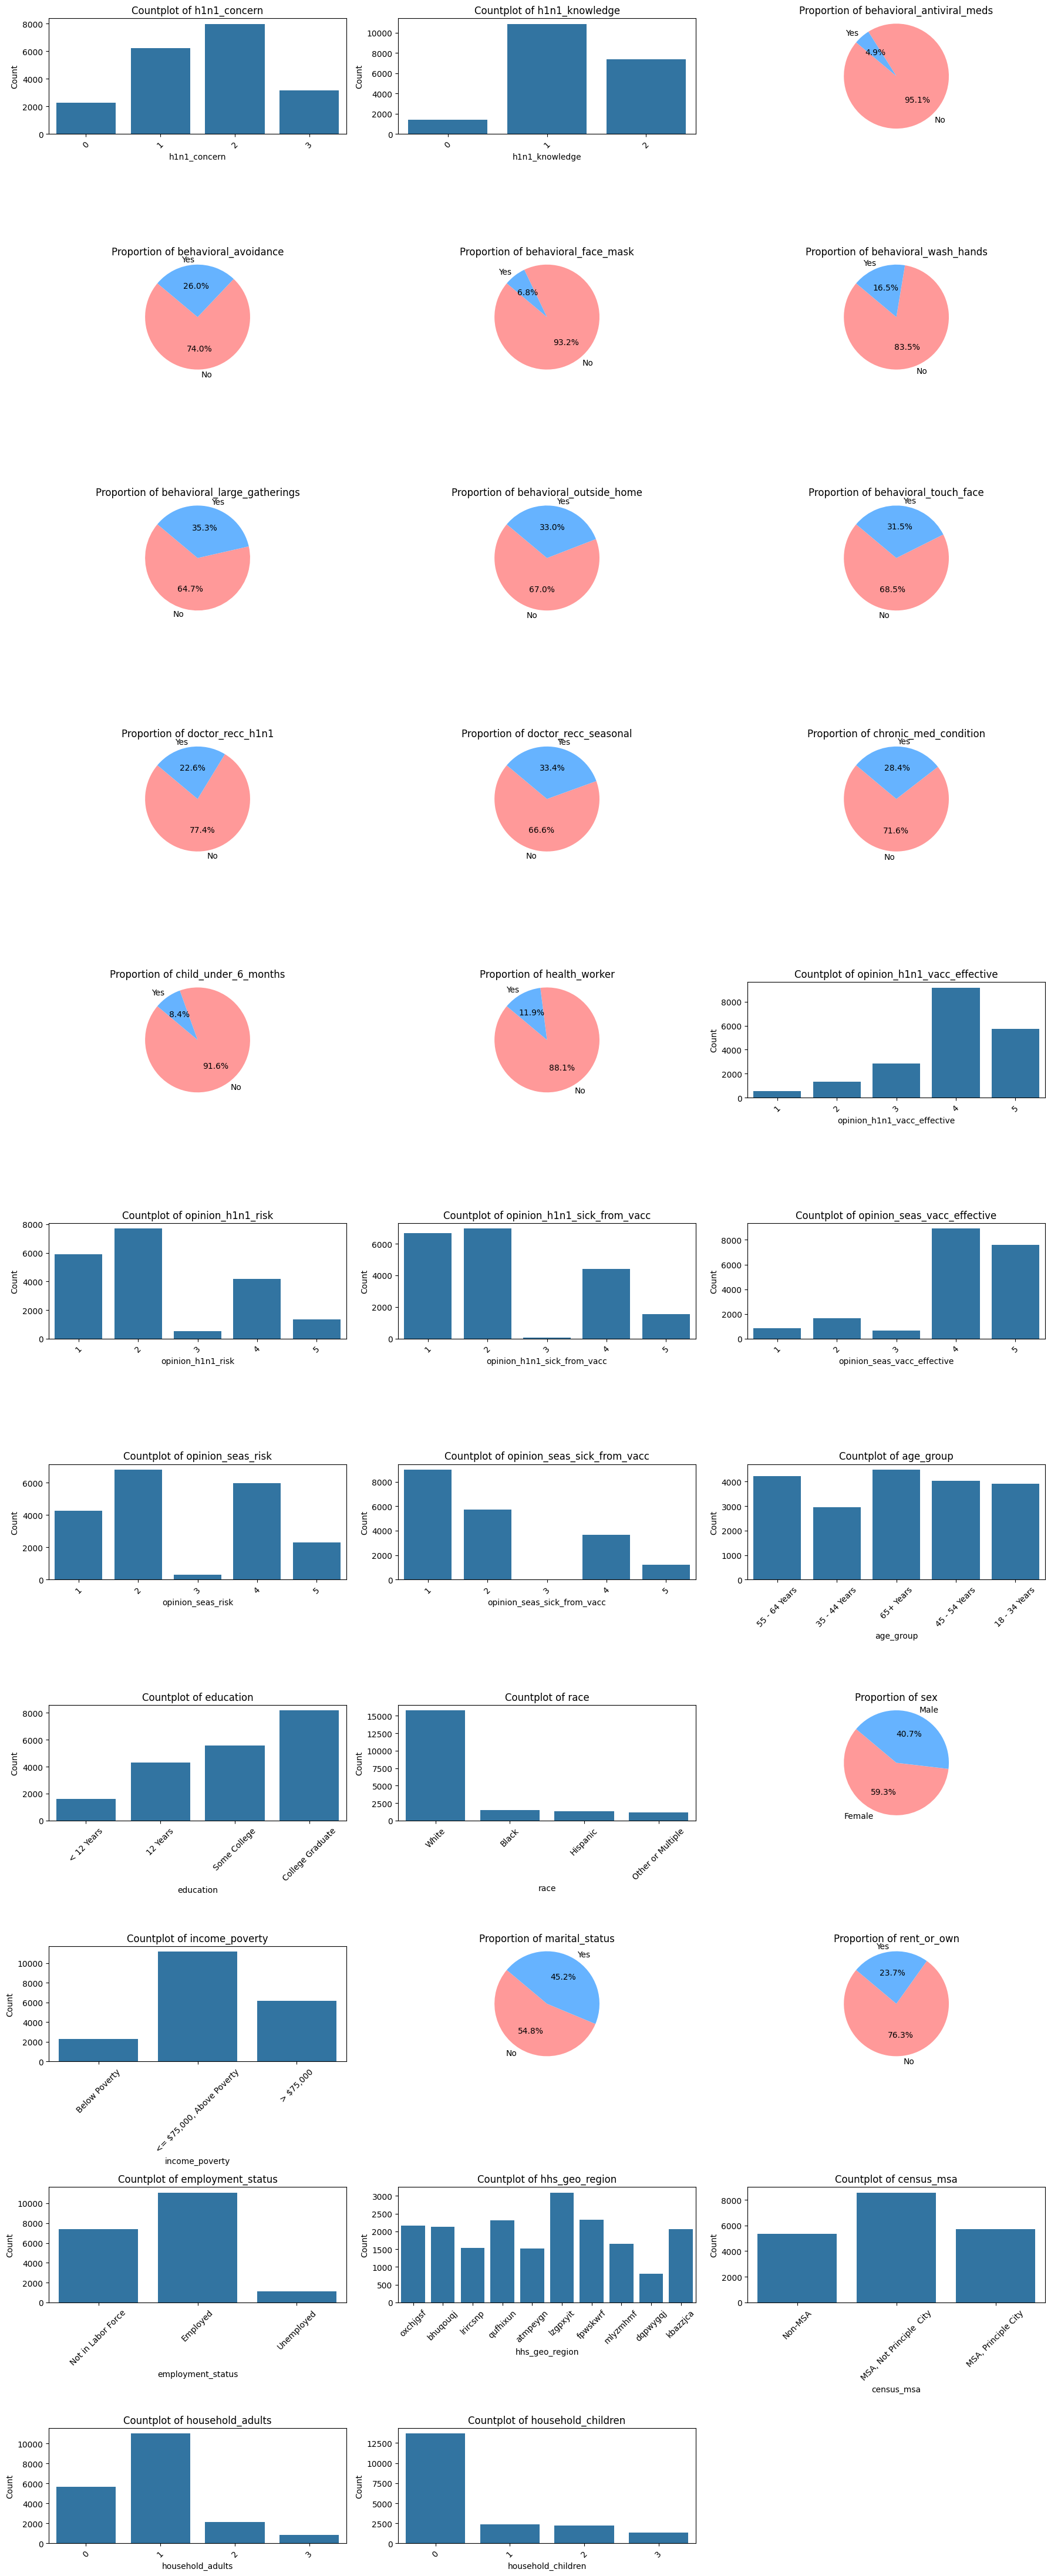

In [56]:
# Drop 'respondent_id', 'h1n1_vaccine', 'seasonal_vaccine' from the features
train_features = train_data.drop(columns=["respondent_id", "h1n1_vaccine", "seasonal_vaccine"])
train_labels = train_data[["h1n1_vaccine", "seasonal_vaccine"]]

train_feat_cols = list(train_features.columns)

# Function to create a pie chart for binary variables
def plot_pie_chart(data: pd.DataFrame, column: str, ax: plt.Axes, title: str) -> None:
  """
  plot pie chart for binary variables
  :param data: dataframe
  :param column: column name
  :param ax: axis
  :param title: title of the plot
  """
  labels = ['No', 'Yes']

  if column == "sex":
      labels = ['Female', 'Male']

  counts = data[column].value_counts()
  sizes = counts.values
  colors = ['#ff9999', '#66b3ff']

  ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
  ax.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
  ax.set_title(title)

# Set up a grid of subplots with 3 columns per row
n_cols = 3
n_rows = (len(train_feat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create plots for each categorical variable
for i, var in enumerate(train_feat_cols):
    if train_features[var].nunique() == 2:  # Check if the variable is binary
        plot_pie_chart(train_features, var, axes[i], f'Proportion of {var}')
    else:
        sns.countplot(data=train_features, x=var, ax=axes[i])
        axes[i].set_title(f'Countplot of {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-tick labels for better readability

# Hide any unused subplots

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [66]:
train_features.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,...,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,1.615518,1.302566,0.049435,0.740454,0.067712,0.834895,0.353274,0.330058,0.685012,0.225995,...,0.083851,0.118725,3.922258,2.359892,2.347622,4.060483,2.757102,2.104979,0.903218,0.551064
std,0.888246,0.596258,0.216780,0.438397,0.251258,0.371285,0.477999,0.470246,0.464523,0.418247,...,0.277171,0.323473,0.982311,1.291151,1.353140,1.062052,1.387503,1.325909,0.746290,0.938224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [62]:
# Select ordinal features for correlation analysis
ordinal_features = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

# Calculate the correlation matrix
correlation_matrix = train_data[ordinal_features].corr()
correlation_matrix


,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
h1n1_concern,1.000000,0.059023,0.239119,0.377835,0.354059,0.230981,0.333491,0.224314
h1n1_knowledge,0.059023,1.000000,0.114658,0.085257,-0.023028,0.078354,0.078006,-0.065231
opinion_h1n1_vacc_effective,0.239119,0.114658,1.000000,0.269342,0.057602,0.472084,0.258877,0.007595
opinion_h1n1_risk,0.377835,0.085257,0.269342,1.000000,0.328622,0.220749,0.563515,0.191525
opinion_h1n1_sick_from_vacc,0.354059,-0.023028,0.057602,0.328622,1.000000,0.069794,0.260782,0.490688
opinion_seas_vacc_effective,0.230981,0.078354,0.472084,0.220749,0.069794,1.000000,0.345423,-0.017887
opinion_seas_risk,0.333491,0.078006,0.258877,0.563515,0.260782,0.345423,1.000000,0.196102
opinion_seas_sick_from_vacc,0.224314,-0.065231,0.007595,0.191525,0.490688,-0.017887,0.196102,1.000000


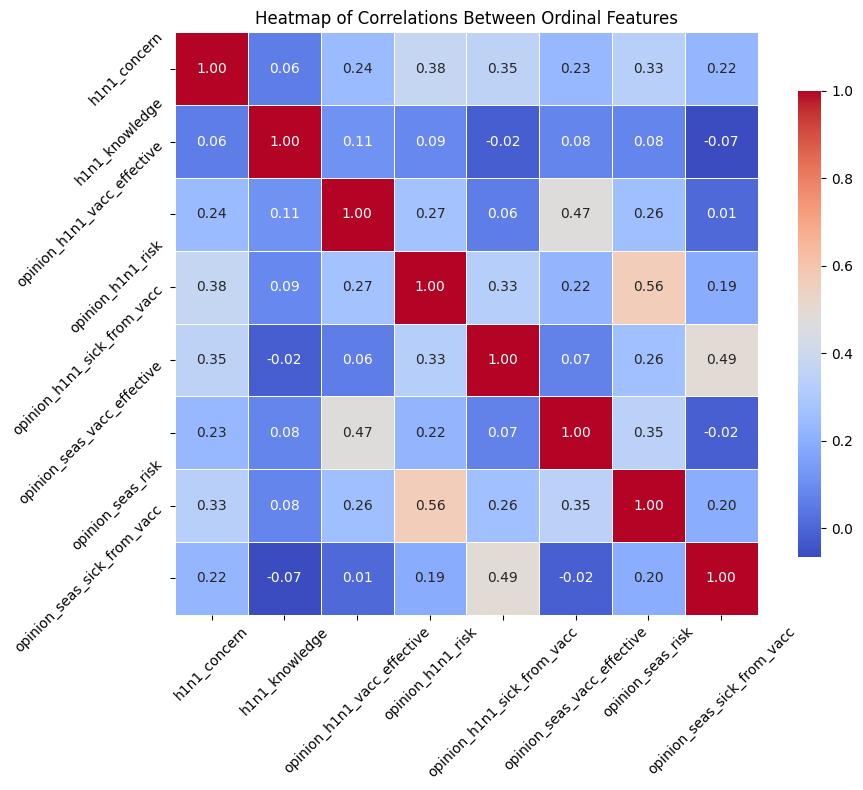

In [63]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Title and labels
plt.title('Heatmap of Correlations Between Ordinal Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()